In [ ]:
# first remove existing data file, if any.
!rm -fv data08.csv
# download it
!wget -q https://www.ieor.iitb.ac.in/files/faculty/amahajan/data08.csv
# show top 5 lines
!head -n5 data08.csv

removed 'data08.csv'
Week;West;North;South;East;Central
1;200;167;80;24;81
2;196;141;99;7;89
3;223;165;147;38;83
4;180;132;87;11;81


In [ ]:
import pandas as pd
df = pd.read_csv("data08.csv", sep=";")
print(df)

     Week  West  North  South  East  Central
0       1   200    167     80    24       81
1       2   196    141     99     7       89
2       3   223    165    147    38       83
3       4   180    132     87    11       81
4       5   194    150    108    16       84
..    ...   ...    ...    ...   ...      ...
360   361   219    136     83    14       82
361   362   212    181    125    77       89
362   363   190    177     98    52       88
363   364   196    147     86    92       81
364   365   209    156    108    71       83

[365 rows x 6 columns]


In [ ]:
#adding a column 'Total Demand' denoting the total demand on each day.
df['Total Demand'] = df.sum(axis=1)
print(df)

     Week  West  North  South  East  Central  Total Demand
0       1   200    167     80    24       81           553
1       2   196    141     99     7       89           534
2       3   223    165    147    38       83           659
3       4   180    132     87    11       81           495
4       5   194    150    108    16       84           557
..    ...   ...    ...    ...   ...      ...           ...
360   361   219    136     83    14       82           895
361   362   212    181    125    77       89          1046
362   363   190    177     98    52       88           968
363   364   196    147     86    92       81           966
364   365   209    156    108    71       83           992

[365 rows x 7 columns]


In [ ]:
columns = list(df.columns.values)
print(columns)

['Week', 'West', 'North', 'South', 'East', 'Central', 'Total Demand']


**1.ANSWER**

In [ ]:
mean = []
variance = []
for ele in columns[1:]:
  mean.append(df[ele].mean())
  variance.append(df[ele].var())
print("Columns = ",columns[1:])
print("mean = ",mean)
print("variance = ",variance)

Columns =  ['West', 'North', 'South', 'East', 'Central', 'Total Demand']
mean =  [199.47123287671232, 150.58904109589042, 99.7095890410959, 40.85205479452055, 84.44109589041096, 758.0630136986301]
variance =  [208.381725124191, 230.38009935270208, 938.4099352702096, 935.6483817552311, 8.752702092428134, 14098.767996387167]


**2.ANSWER**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
#df.plot()
#plt.show()


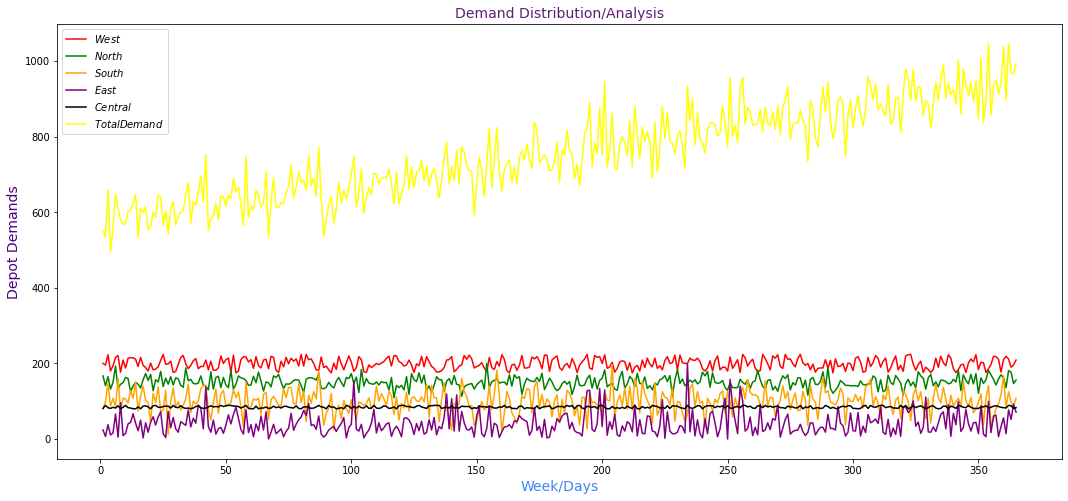

In [ ]:
plt.figure(figsize=(18,8))
plt.plot(df.loc[:,'Week'],df.loc[:,'West'],color='red',label=r'$West$')
plt.plot(df.loc[:,'Week'],df.loc[:,'North'],color='green',label=r'$North$')
plt.plot(df.loc[:,'Week'],df.loc[:,'South'],color='orange',label=r'$South$')
plt.plot(df.loc[:,'Week'],df.loc[:,'East'],color='purple',label=r'$East$')
plt.plot(df.loc[:,'Week'],df.loc[:,'Central'],color='black',label=r'$Central$')
plt.plot(df.loc[:,'Week'],df.loc[:,'Total Demand'],color='yellow',label=r'$Total Demand$')
plt.title('Demand Distribution/Analysis',fontsize=14,color='#601E70')
plt.xlabel('Week/Days',fontsize=14,color='#4285F4')
plt.ylabel('Depot Demands',fontsize=14,color='indigo')
plt.legend(loc='upper left')

**3.ANSWER** \

In [ ]:
Std_list = []
for ele in columns[1:]:
   Std_list.append(df[ele].std())
print("Standard deviations of:") 
print("['West', 'North', 'South', 'East', 'Central', 'Total Demand'] = ",Std_list)

Standard deviations of:
['West', 'North', 'South', 'East', 'Central', 'Total Demand'] =  [14.435432973215283, 15.17827721952337, 30.63347736170691, 30.588370040837923, 2.958496593276412, 118.73823308600801]


**coment :** \
As we know that, a set of values that are closely clustered near the mean will have a low standard deviation, a set of numbers that are widely apart will have a higher standard deviation. Alternatively, greater the standard deviation greater will be the magnitude of the deviation of the value from their mean.
Now,The standard deviation of south and east depot is more so it says that the deviation from mean is 30 units for each of these. While for Central depot we have a minimum standard deviation of 2.95 $\approx 3 $. Thus, the number of daily required truckloads are closely clustered near the mean value 84 obtained above.


**4.Q solving approach:** \
Since, a truck going $West$ can come back to the $plant$ in 2 days(1 day for reaching depot and 1 day for returning to the plant).
We can start with assuming that trucks started trip from the $plant$ on day=0 to satisfy the demand on 1st day. As soon as it reaches the depot it started its return trip, meanwhile to satisfy the day 2 demand trucks started their trip from the plant on day 1, and so on.... \
**Similarly we can proceed for other depots....**



In [ ]:
West=list(df.iloc[:,1])
print("List of daily demands of depot West:")
print("West = ",West)  

# Trucks in Transit for depot "West".
TW = []  # list of number of trucks in transit, each day, for depot 'West' 
i=0
while i<365:
    if 0<=i<364:
      TW.append(West[i]+West[i+1])   
    else:
      TW.append(West[i])
    i=i+1  
print("\nTrucks in Transit for depot West:")
print('TW = ',TW)
Days_list = list(df.loc[:,'Week'])
print("\nDays_list = ",Days_list)

List of daily demands of depot West:
West =  [200, 196, 223, 180, 194, 216, 221, 177, 209, 188, 214, 215, 215, 211, 192, 216, 195, 189, 180, 201, 183, 185, 191, 208, 224, 198, 199, 206, 176, 179, 197, 216, 221, 199, 186, 195, 207, 213, 186, 192, 192, 209, 183, 206, 182, 182, 188, 220, 200, 210, 214, 177, 222, 175, 180, 210, 218, 217, 204, 210, 187, 218, 194, 188, 209, 211, 186, 219, 216, 182, 176, 206, 191, 216, 199, 214, 206, 212, 193, 224, 193, 224, 210, 212, 200, 183, 182, 217, 189, 193, 183, 175, 201, 184, 219, 199, 183, 202, 220, 204, 179, 189, 218, 210, 178, 176, 196, 189, 194, 200, 197, 201, 205, 214, 219, 193, 221, 220, 205, 201, 193, 196, 209, 196, 176, 199, 194, 219, 191, 218, 205, 192, 187, 177, 178, 181, 189, 209, 210, 218, 178, 184, 193, 196, 221, 211, 222, 212, 188, 192, 195, 202, 188, 178, 216, 189, 184, 205, 193, 223, 211, 181, 175, 196, 198, 182, 195, 221, 188, 188, 190, 217, 212, 218, 206, 186, 222, 222, 179, 209, 215, 220, 189, 182, 195, 200, 188, 213, 199, 176, 195,

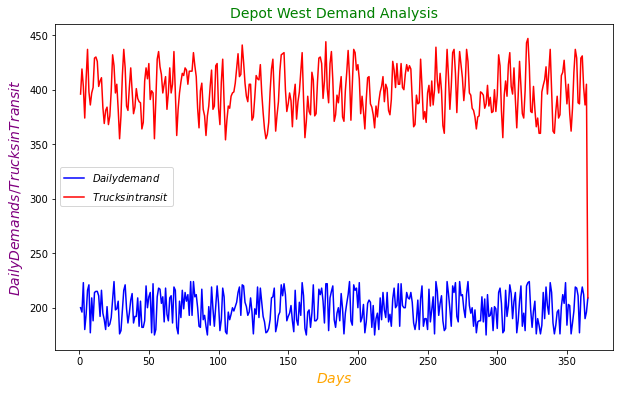

In [ ]:
#plotting line graph for depot 'West'
plt.figure(figsize=(10,6))
plt.plot(Days_list,West,color='b',label=r'$Daily demand$')
plt.plot(Days_list,TW,color='r',label=r'$Trucks in transit$')
plt.title('Depot West Demand Analysis',fontsize=14,color='g')
plt.xlabel(r'$Days$',fontsize=14,color='orange')
plt.ylabel(r'$Daily Demands/Trucks in Transit$',fontsize=14,color='purple')
plt.legend()


In [ ]:
#Since trips to North and South take 3 days we have can have same code structure. 
#Also we have to start 1 and half days earlier from the plant for timely delivery at depots.
North=list(df.iloc[:,2])
print("List of daily demands of depot North:")
print("North = ",North) 

South=list(df.iloc[:,3])
print("List of daily demands of depot South:")
print("South = ",South)

# Trucks in Transit for depot "North".
TN = []  # list of number of trucks in transit, each day, for depot 'North' 
TS = []  # list of number of trucks in transit, each day, for depot 'South'
i=0
while i<365:
    if i==0:
      TN.append(North[i]+North[i+1]) 
      TS.append(South[i]+South[i+1])
    elif i==364:  
      TN.append(North[i-1]+North[i]) 
      TS.append(South[i-1]+South[i])
    else:
      TN.append(North[i-1]+North[i]+North[i+1])
      TS.append(South[i-1]+South[i]+South[i+1])
    i=i+1  
print("\nTrucks in Transit for depot North:")
print('TN = ',TN)
print("\nTrucks in Transit for depot South:")
print('TS = ',TS)

List of daily demands of depot North:
North =  [167, 141, 165, 132, 150, 193, 133, 145, 149, 163, 160, 125, 140, 150, 145, 135, 157, 173, 155, 171, 128, 157, 151, 179, 139, 161, 145, 165, 143, 162, 159, 142, 137, 188, 154, 158, 147, 146, 148, 167, 143, 140, 130, 178, 132, 163, 166, 136, 163, 143, 136, 182, 132, 145, 167, 162, 160, 155, 142, 143, 166, 149, 177, 153, 127, 151, 149, 138, 167, 163, 171, 151, 133, 146, 145, 148, 155, 157, 156, 141, 123, 158, 162, 162, 160, 156, 173, 134, 133, 137, 150, 141, 135, 153, 163, 150, 139, 163, 160, 173, 147, 164, 123, 184, 140, 160, 148, 146, 145, 151, 143, 152, 149, 150, 130, 163, 109, 142, 136, 142, 130, 165, 118, 173, 157, 152, 175, 148, 169, 130, 140, 123, 142, 165, 157, 157, 127, 153, 160, 144, 168, 145, 143, 113, 138, 143, 145, 147, 132, 144, 150, 156, 132, 200, 136, 152, 155, 160, 148, 150, 151, 143, 170, 140, 170, 161, 165, 118, 145, 161, 155, 153, 152, 163, 152, 174, 131, 145, 161, 151, 136, 128, 133, 146, 153, 145, 152, 118, 139, 169, 14

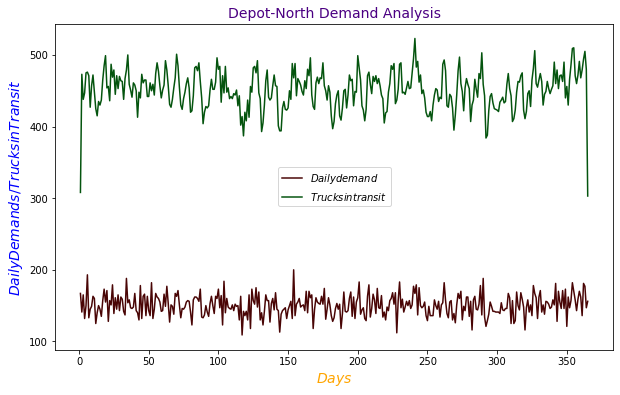

In [ ]:
#plotting line graph for depot 'North'
plt.figure(figsize=(10,6))
plt.plot(Days_list,North,color='#490505',label=r'$Daily demand$')
plt.plot(Days_list,TN,color='#04540e',label=r'$Trucks in transit$')
plt.title('Depot-North Demand Analysis',fontsize=14,color='indigo')
plt.xlabel(r'$Days$',fontsize=14,color='orange')
plt.ylabel(r'$Daily Demands/Trucks in Transit$',fontsize=14,color='b')
plt.legend()

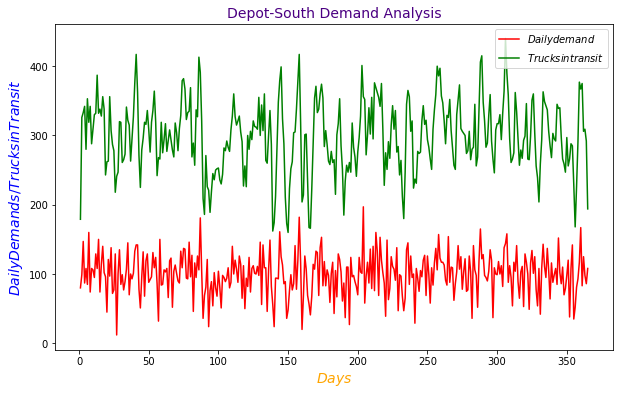

In [ ]:
#plotting line graph for depot 'South'
plt.figure(figsize=(10,6))
plt.plot(Days_list,South,color='red',label=r'$Daily demand$')
plt.plot(Days_list,TS,color='green',label=r'$Trucks in transit$')
plt.title('Depot-South Demand Analysis',fontsize=14,color='indigo')
plt.xlabel(r'$Days$',fontsize=14,color='orange')
plt.ylabel(r'$Daily Demands/Trucks in Transit$',fontsize=14,color='b')
plt.legend()

List of daily demands of depot East:
East =  [24, 7, 38, 11, 16, 66, 5, 96, 9, 15, 40, 44, 67, 42, 22, 50, 3, 43, 18, 45, 59, 37, 58, 72, 14, 4, 73, 30, 57, 27, 18, 46, 41, 36, 77, 32, 55, 42, 90, 82, 27, 138, 33, 18, 50, 13, 27, 31, 15, 37, 64, 40, 65, 84, 54, 25, 13, 78, 17, 38, 6, 40, 22, 61, 24, 72, 0, 18, 39, 14, 20, 27, 6, 20, 29, 68, 23, 39, 51, 58, 76, 62, 94, 36, 38, 26, 61, 13, 5, 12, 24, 29, 34, 20, 32, 41, 57, 3, 30, 39, 153, 26, 21, 39, 3, 15, 24, 42, 78, 16, 43, 22, 30, 40, 43, 7, 25, 34, 23, 6, 55, 56, 51, 37, 12, 41, 22, 47, 13, 17, 51, 24, 57, 11, 33, 27, 57, 119, 27, 107, 21, 117, 21, 73, 43, 25, 24, 32, 5, 62, 85, 14, 6, 28, 89, 6, 42, 37, 4, 19, 32, 33, 38, 29, 48, 46, 62, 54, 50, 46, 10, 23, 83, 23, 34, 5, 52, 3, 5, 34, 22, 54, 45, 61, 67, 68, 27, 44, 22, 17, 16, 8, 71, 128, 129, 25, 20, 40, 134, 33, 130, 10, 46, 26, 65, 11, 7, 35, 21, 46, 40, 19, 90, 8, 51, 15, 14, 61, 60, 21, 19, 6, 35, 104, 2, 72, 21, 14, 14, 18, 36, 32, 16, 199, 19, 79, 8, 51, 14, 3, 54, 14, 67

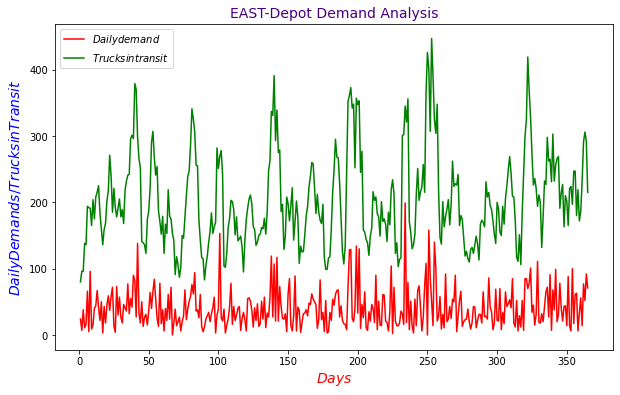

In [ ]:
##DEPOT EAST
#Since, a trip to depot East takes 5days, we need to plan trucks journey 2 and half days early for timely delivery
East=list(df.iloc[:,4])
print("List of daily demands of depot East:")
print("East = ",East) 

TE = []  # list of number of trucks in transit, each day, for depot 'EAST' 

i=0
while i<365:
    if i==0:
      TE.append(East[i]+East[i+1]+East[i+2]+East[i+3])
    elif i==1:
      TE.append(East[i-1]+East[i]+East[i+1]+East[i+2]+East[i+3]) 
    elif 2<=i<=362:
      TE.append(East[i-2]+East[i-1]+East[i]+East[i+1]+East[i+2])
    elif i==363:
      TE.append(East[i-2]+East[i-1]+East[i]+East[i+1])      
    else:
      TE.append(East[i-2]+East[i-1]+East[i])
    i=i+1  
print("\nTrucks in Transit for depot East:")
print('TE = ',TE)

#plotting line graph for 'DEPOT EAST'
plt.figure(figsize=(10,6))
plt.plot(Days_list,East,color='red',label=r'$Daily demand$')
plt.plot(Days_list,TE,color='green',label=r'$Trucks in transit$')
plt.title('EAST-Depot Demand Analysis',fontsize=14,color='indigo')
plt.xlabel(r'$Days$',fontsize=14,color='red')
plt.ylabel(r'$Daily Demands/Trucks in Transit$',fontsize=14,color='b')
plt.legend()


List of daily demands of Central Depot = list of number of trucks in transit 
TC = Central =  [81, 89, 83, 81, 84, 82, 88, 80, 84, 89, 83, 82, 80, 80, 85, 80, 87, 88, 85, 80, 88, 89, 84, 84, 86, 87, 87, 82, 89, 84, 83, 88, 83, 81, 82, 80, 82, 86, 88, 83, 81, 82, 85, 88, 85, 86, 85, 89, 86, 88, 89, 89, 87, 87, 86, 82, 85, 89, 81, 80, 80, 87, 80, 82, 82, 85, 81, 82, 87, 83, 85, 82, 86, 87, 84, 83, 82, 88, 81, 80, 85, 85, 85, 81, 82, 85, 89, 85, 84, 80, 89, 84, 85, 80, 81, 83, 80, 89, 87, 81, 86, 82, 87, 83, 82, 88, 81, 82, 89, 82, 81, 83, 88, 86, 81, 82, 85, 80, 88, 89, 89, 86, 86, 84, 83, 87, 89, 85, 83, 81, 88, 88, 89, 89, 89, 81, 83, 84, 82, 88, 82, 83, 82, 87, 86, 86, 86, 80, 83, 81, 88, 85, 86, 84, 86, 85, 82, 82, 85, 84, 89, 83, 86, 81, 81, 80, 87, 87, 80, 83, 82, 82, 80, 88, 80, 84, 86, 86, 88, 80, 82, 86, 86, 86, 84, 89, 86, 89, 80, 88, 89, 82, 80, 87, 85, 84, 86, 81, 89, 89, 84, 80, 80, 86, 81, 83, 81, 84, 81, 87, 83, 81, 89, 80, 80, 86, 82, 84, 82, 89, 87, 86, 82, 84, 81, 88, 8

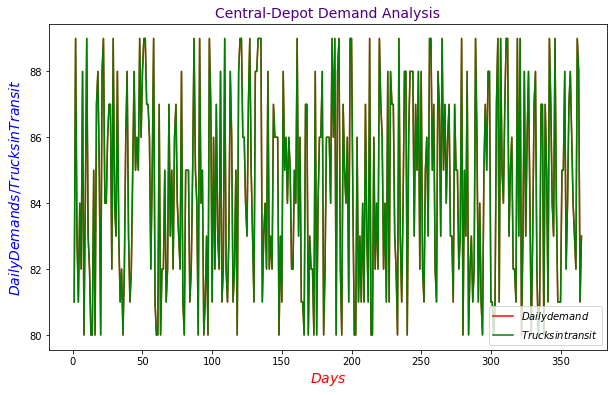

In [ ]:
##Central Depot

#Since, a trip to Central depot takes only 1day. A truck starting from plant to the depot will return to the depot on same day.
#So, the number of trucks in transit will be same as the each day demand of Central depot. 

TC = Central = list(df.iloc[:,5]) #list of number of trucks in transit
print("List of daily demands of Central Depot = list of number of trucks in transit ")
print("TC = Central = ",TC) 
print("\nPlot for daily demands and trucks in transit will coincide\n")

#plotting line graph for 'CENTRAL  DEPOT'
plt.figure(figsize=(10,6))
plt.plot(Days_list,TC,color='red',label=r'$Daily demand$')
plt.plot(Days_list,TC,color='green',label=r'$Trucks in transit$')
plt.title('Central-Depot Demand Analysis',fontsize=14,color='indigo')
plt.xlabel(r'$Days$',fontsize=14,color='red')
plt.ylabel(r'$Daily Demands/Trucks in Transit$',fontsize=14,color='b')
plt.legend()

**5.ANSWER** \


In [ ]:
Transit_Trucks = []
for i in range(365):
  Transit_Trucks.append(TW[i]+TN[i]+TS[i]+TE[i]+TC[i])
print("Maximum value of Total Trucks in Transit each day = ",max(Transit_Trucks))

Maximum value of Total Trucks in Transit each day =  1719


**the number of trucks required to service all demands = Maximum value of Total Trucks in transit each day = 1719**

In [ ]:
print("The average number of trucks in use = ",np.mean(Transit_Trucks))

The average number of trucks in use =  1435.8739726027397


In [ ]:
print('Standard deviation of trucks in use = ',np.std(Transit_Trucks))

Standard deviation of trucks in use =  97.06089322588923


In [ ]:
#the number of total idle truck-days in the system
Idle_Trucks=[]
Idle_days=0
for i in range(365):
  Idle_Trucks.append(max(Transit_Trucks)-Transit_Trucks[i])
  if max(Transit_Trucks)-Transit_Trucks[i]>0:
    Idle_days=Idle_days+1
  else:
    pass
print("idle truck-days in the system = ",(sum(Idle_Trucks),Idle_days))
print('The number of days on which trucks were idle = ',Idle_days)

idle truck-days in the system =  (103341, 364)
The number of days on which trucks were idle =  364


**6.ANSWER**

In [ ]:
print("IF only 90% of the trucks estimated in the previous question are available, then Available amount is = ",0.9*1719)
Lost=[]
for i in range(0,365):
  if (0.9*1719 - Transit_Trucks[i])<0:
    Lost.append(-(0.9*1719 - Transit_Trucks[i]))
print("\nLost demand is = ",sum(Lost))




IF only 90% of the trucks estimated in the previous question are available, then Available amount is =  1547.1000000000001

Lost demand is =  2134.3999999999933


In [ ]:
print(Lost)

[2.8999999999998636, 132.89999999999986, 171.89999999999986, 38.899999999999864, 24.899999999999864, 29.899999999999864, 4.899999999999864, 22.899999999999864, 19.899999999999864, 8.899999999999864, 11.899999999999864, 45.899999999999864, 67.89999999999986, 35.899999999999864, 5.899999999999864, 86.89999999999986, 78.89999999999986, 33.899999999999864, 16.899999999999864, 78.89999999999986, 134.89999999999986, 13.899999999999864, 71.89999999999986, 36.899999999999864, 51.899999999999864, 53.899999999999864, 41.899999999999864, 96.89999999999986, 148.89999999999986, 17.899999999999864, 3.8999999999998636, 29.899999999999864, 22.899999999999864, 9.899999999999864, 41.899999999999864, 76.89999999999986, 110.89999999999986, 40.899999999999864, 3.8999999999998636, 8.899999999999864, 33.899999999999864, 23.899999999999864, 51.899999999999864, 34.899999999999864, 46.899999999999864, 2.8999999999998636]


**7.ANSWER**

In [ ]:
print("If no trucks are available on a given day, the shipment waits at the plant. then the number of shipments which are are delayed = "
,sum(Lost)," which is equal to the lost demand in the previous question")

If no trucks are available on a given day, the shipment waits at the plant. then the number of shipments which are are delayed =  2134.3999999999933  which is equal to the lost demand in the previous question
